## Import libraries

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
import scipy.stats as sp
import collections

In [2]:
import networkx as nx
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import matplotlib.pyplot as plt

## Import graph

B. Rozemberczki, C. Allen and R. Sarkar. Multi-scale Attributed Node Embedding.(2019)

@misc{
- rozemberczki2019multiscale,
- title={Multi-scale Attributed Node Embedding},
- author={Benedek Rozemberczki and Carl Allen and Rik Sarkar},
- year={2019},
- eprint={1909.13021},
- archivePrefix={arXiv},
- primaryClass={cs.LG}          
        }

In [3]:
fb_pages = pd.read_csv(r"C:\Users\USER\Downloads\facebook_large\facebook_large\musae_facebook_edges.csv")
#fb_pages.rename(columns={"id_1": "1", "id_2": "2"}).tail(10)

In [4]:
#fb_pages.to_csv(r"C:\Users\USER\Downloads\facebook_large\facebook_large\musae_facebook_edges_new.csv",header=False, index=False)

In [5]:
fb = nx.read_graphml(r"C:\Users\USER\Downloads\facebook_net.graphml")
nx.info(fb)
print('Number of nodes: {} - Number of links: {}'.format(fb.order(),fb.size()))

Number of nodes: 22470 - Number of links: 171002


In [6]:
fb.is_directed()

True

In [7]:
fb = fb.to_undirected()

In [8]:
fb.nodes

NodeView(('0', '18427', '1', '21708', '22208', '22171', '6829', '16590', '20135', '8894', '15785', '10281', '22265', '7136', '22405', '10379', '13737', '8533', '14344', '2812', '5755', '16260', '15026', '17370', '17460', '8049', '5307', '4987', '18304', '12305', '19743', '20024', '21729', '10554', '11557', '5228', '9934', '2', '9048', '6353', '2629', '11537', '13205', '22304', '17728', '19337', '126', '17554', '8495', '5857', '3', '16742', '293', '5826', '3479', '19753', '17346', '10945', '22338', '11319', '9654', '4', '13645', '20876', '11446', '16203', '2830', '2004', '20624', '21280', '1182', '21538', '1443', '11423', '187', '5730', '2983', '1489', '6823', '17695', '11102', '6390', '17242', '10018', '5147', '6427', '14628', '1882', '22401', '16128', '12872', '9263', '14155', '21631', '6329', '17507', '2282', '9706', '4738', '3676', '16972', '5356', '8514', '14332', '7212', '8843', '1879', '1377', '1997', '7813', '3891', '2732', '4109', '5', '8288', '9206', '1840', '17845', '17411', 

### Adding name to nodes

In [9]:
fb_features = pd.read_csv(R"C:\Users\USER\Downloads\facebook_large\facebook_large\musae_facebook_target.csv")
fb_features.tail(10)

,id,facebook_id,page_name,page_type
22460,22460,208741279137778,US National Weather Service Amarillo Texas,government
22461,22461,238809486131187,Bosch Professional Power Tools and Accessories,company
22462,22462,562512487251956,Werner Langen,politician
22463,22463,170298223273,Memphis VA Medical Center,government
22464,22464,198333355974,Keurig,company
22465,22465,1379955382222841,Kurt Wiegel MdL,politician
22466,22466,1651527995097082,dubdub Stories,company
22467,22467,155369444540412,Ministerio del Interior - Paraguay,government
22468,22468,175067819212798,Tottus Perú,company
22469,22469,27208897877,SPORT1 Doppelpass,tvshow


In [10]:
fb_net = pd.merge(left=fb_pages, right=fb_features, left_on='id_1', right_on='id')
fb_net.drop_duplicates(subset=None, keep='first', inplace=False)
fb_net.set_index('id_2').drop(columns=['id_1', 'id']).head(100)

,facebook_id,page_name,page_type
id_2,,,
18427,145647315578475,The Voice of China 中国好声音,tvshow
21708,191483281412,U.S. Consulate General Mumbai,government
22208,191483281412,U.S. Consulate General Mumbai,government
22171,191483281412,U.S. Consulate General Mumbai,government
6829,191483281412,U.S. Consulate General Mumbai,government
...,...,...,...
16972,1408935539376139,Mark Bailey MP - Labor for Miller,politician
5356,1408935539376139,Mark Bailey MP - Labor for Miller,politician
8514,1408935539376139,Mark Bailey MP - Labor for Miller,politician


In [11]:
missing = []

for n,data in fb.nodes(data=True):
    #print(n,data)
    
    x = float(data["label"])
    if x in fb_net.index:
        fb.nodes[n]["name"] = fb_net["page_name"][ x ]
        fb.nodes[n]["type"] = fb_net["page_type"][ x ]
    else:
        missing.append(x)
        fb.nodes[n]["name"] = "Null"
        fb.nodes[n]["type"] = "Null"

In [12]:
len(missing)

0

In [13]:
nx.write_graphml(G=fb,path=r"C:\Users\USER\Desktop\fb-net-new.graphml")

In [14]:
fb = nx.read_graphml(r"C:\Users\USER\Desktop\fb-net-new.graphml")
fb.is_directed()

False

In [15]:
#fb_net = fb_net.to_csv(r"C:\Users\USER\Desktop\facebook_pages.csv", header=False, index = False)

In [ ]:
# draw the graph with labels
pos = nx.spring_layout(fb)
plt.figure(figsize=(15,15))

nx.draw_networkx_nodes(fb, pos, node_size=20)
nx.draw_networkx_edges(fb, pos, alpha=0.5)

nx.draw_networkx_labels(fb,pos,font_size=3,font_color='r')
plt.show()
plt.savefig('network.no.png')

## Average degree

In [17]:
degree_list = list(dict(fb.degree()).values())
print ("avg degree:  ", np.mean(degree_list))

avg degree:   15.220471740097908


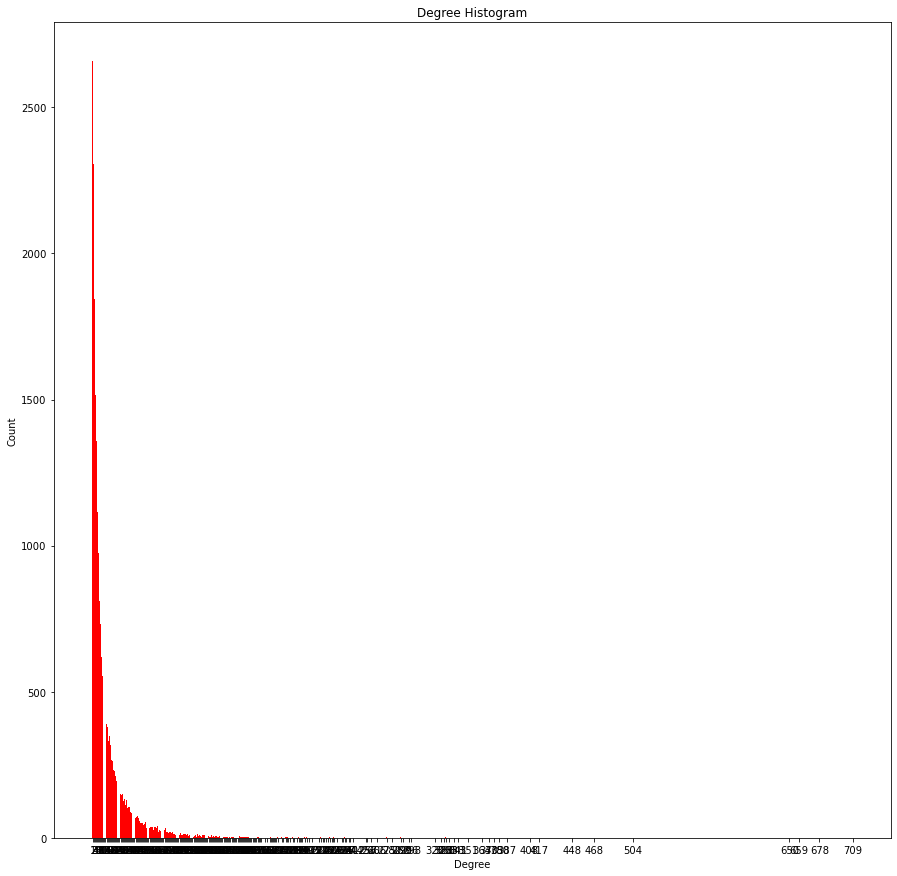

In [18]:
degree_sequence = sorted([d for n, d in fb.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(15,15))
plt.bar(deg, cnt, width=0.80, color='r')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.savefig('degree_histogram.png')

In [19]:
print("Graph Degree statistics: ")
print("Mean: " + str(np.mean(degree_list)))
print("Median: " + str(np.median(degree_list))) 
print("Standard deviation: " + str(np.std(degree_list)))
print("Maximum: " + str(np.max(degree_list)))
print("Minimum: " + str(np.min(degree_list)))
print("Assortativity coefficient: " + str(nx.degree_assortativity_coefficient(fb)))

Graph Degree statistics: 
Mean: 15.220471740097908
Median: 7.0
Standard deviation: 26.413843606902006
Maximum: 709
Minimum: 1
Assortativity coefficient: 0.08505802105736317


Minimum degree is 1, so there are no isolated nodes. Mean value is higher that median, so we deal with a scale-free network. To verify this we will check degree distribution and compare it to the random network degree distribution.

## Density
Graph density is low and it indicates the low fraction of existing links between fb pages with respect to the possible links.

In [20]:
fb_density = nx.density(fb)
print("Density: " + str(fb_density))

Density: 0.000677398715568023


## ECDF and ECCDF

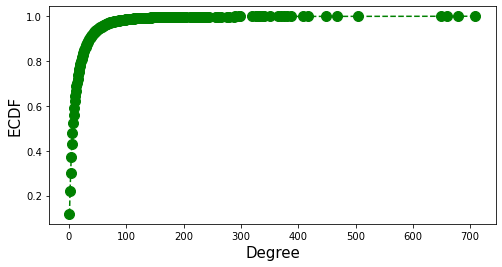

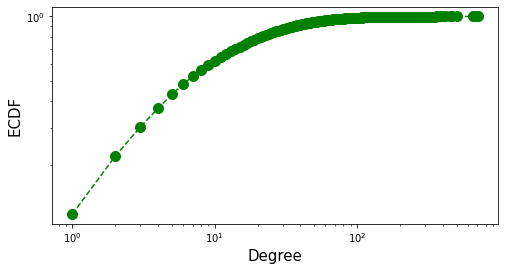

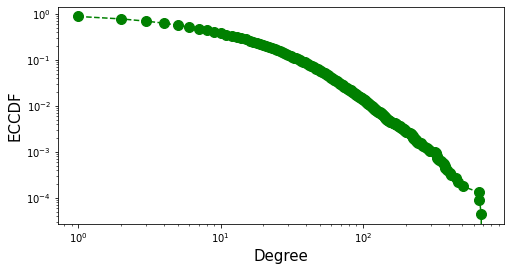

In [21]:
cdf_function = ECDF(degree_list)
x = np.unique(degree_list)
y = cdf_function(x)

# ECDF in linear scale
fig_cdf_function = plt.figure(figsize=(8,4)) 
axes = fig_cdf_function.gca()
axes.plot(x,y,color = 'green', linestyle = '--', marker= 'o',ms = 10)
axes.set_xlabel('Degree',size = 15)
axes.set_ylabel('ECDF',size = 15)
plt.savefig('ECDF-simple.png')

# ECDF in loglog scale
fig_cdf_function = plt.figure(figsize=(8,4))
axes = fig_cdf_function.gca()
axes.loglog(x,y,color = 'green', linestyle = '--', marker= 'o',ms = 10)
axes.set_xlabel('Degree',size = 15)
axes.set_ylabel('ECDF',size = 15)
plt.savefig('ECDFlog-simple.png')

# ECCDF in loglog scale
y = 1-cdf_function(x)
fig_ccdf_function = plt.figure(figsize=(8,4))
axes = fig_ccdf_function.gca()
axes.loglog(x,y,color = 'green', linestyle = '--', marker= 'o',ms = 10)
axes.set_xlabel('Degree',size = 15)
axes.set_ylabel('ECCDF',size = 15)
plt.savefig('ECCDF-simple.png')

## Comparison with an Erdos-Renyi random graph G(N, p)

Generating a random graph with the same number of nodes N and the probability of nodes to be randomly linked equal to the graph density.

In [22]:
p = fb_density
random_graph = nx.fast_gnp_random_graph(fb.order(),p)

In [23]:
print('Number of nodes: {} - Number of links: {}'.format(random_graph.order(),random_graph.size()))

Number of nodes: 22470 - Number of links: 171837


In [24]:
random_degree = list(dict(random_graph.degree()).values())

In [25]:
print("Random Graph Degree statistics: ")
print('Random Graph Standard deviation: {}'.format(np.std(random_degree))) 
print('Random Graph Mean: {}'.format(np.mean(random_degree)))
print('Random Graph Median: {}'.format(np.median(random_degree)))
print('Random Graph Min: {}'.format(np.min(random_degree))) 
print('Random Graph Max: {}'.format(np.max(random_degree)))
print("Assortativity coefficient: " + str(nx.degree_assortativity_coefficient(random_graph)))

Random Graph Degree statistics: 
Random Graph Standard deviation: 3.921647444906463
Random Graph Mean: 15.29479305740988
Random Graph Median: 15.0
Random Graph Min: 3
Random Graph Max: 34
Assortativity coefficient: 0.001007952426580768


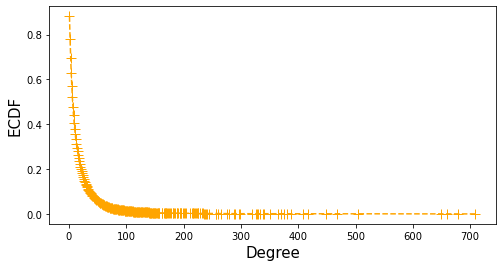

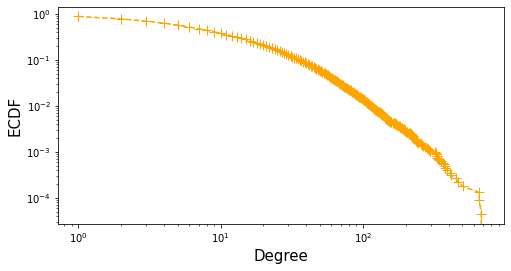

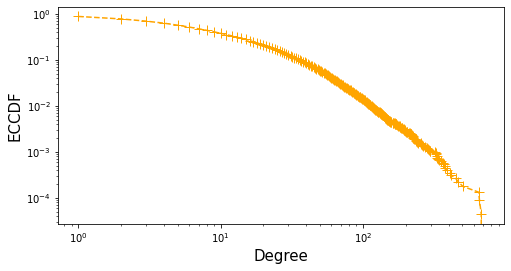

In [26]:
# ECDF in linear scale
cdf_random = ECDF(random_degree)
x_random = np.unique(random_degree)
y_random = cdf_random(x_random)

fig_cdf_function = plt.figure(figsize=(8,4)) 
axes = fig_cdf_function.gca()
axes.plot(x,y, color='orange', marker='+', linestyle = '--',ms = 10)
axes.set_xlabel('Degree',size = 15)
axes.set_ylabel('ECDF',size = 15)
plt.savefig('ECDF.png')

# ECDF in loglog scale
fig_cdf_function = plt.figure(figsize=(8,4))
axes = fig_cdf_function.gca()
axes.loglog(x,y,color='orange', marker='+', linestyle = '--',ms = 10)
axes.set_xlabel('Degree',size = 15)
axes.set_ylabel('ECDF',size = 15)
plt.savefig('ECDFlog.png')

# ECCDF in loglog scale
y = 1-cdf_function(x)
fig_ccdf_function = plt.figure(figsize=(8,4))
axes = fig_ccdf_function.gca()
axes.loglog(x,y,color='orange', marker='+', linestyle = '--',ms = 10)
axes.set_xlabel('Degree',size = 15)
axes.set_ylabel('ECCDF',size = 15)
plt.savefig('ECCDF.png')

## Comparison

Facebook pages graph degree distribution follows Power Law (Heavy Tail distribution) while random graph degree distribution is Poisson distribution. Heavy Tail indicates presence of hubs and the scale-free property of the network.

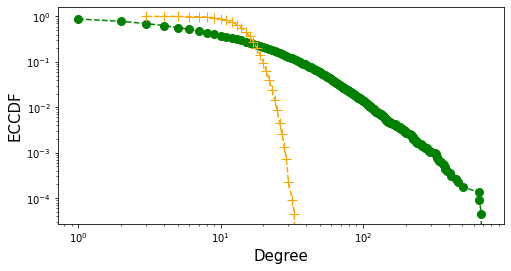

In [27]:
cdf = ECDF(degree_list)
x = np.unique(degree_list)
y = cdf(x)

cdf_random = ECDF(random_degree)
x_random = np.unique(random_degree)
y_random = cdf_random(x_random)

fig_cdf_fb = plt.figure(figsize=(8,4))
axes = fig_cdf_fb.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,1-y,color = 'green',marker='o',ms=8, linestyle='--')
axes.loglog(x_random,1-y_random,color='orange', marker='+',ms=10, linestyle='--')
axes.set_xlabel('Degree',size=15)
axes.set_ylabel('ECCDF', size = 15)
plt.savefig('comparison.png')

## Hubs and isolated nodes

In [28]:
percentile_99 = np.percentile(degree_list,99)
print(percentile_99)

114.31000000000131


Nodes that have a degree higher that 114 will be considered as hub

In [29]:
hub = [k for k,v in dict(fb.degree()).items() if v>= percentile_99]
print(len(hub))
print(list(hub))

hub_labels= []
for i in hub:
    i= fb_net["page_name"][int(i)]
    hub_labels.append (i)
print (hub_labels)

225
['21708', '22208', '22171', '20135', '15785', '22265', '10379', '17370', '8049', '5307', '19743', '20024', '21729', '187', '11102', '16972', '14862', '1193', '4000', '290', '3300', '22403', '16052', '15644', '2773', '14497', '11332', '2280', '5458', '18512', '4502', '17866', '10426', '18216', '9220', '20276', '11804', '11323', '11644', '8139', '961', '8232', '15174', '11498', '7966', '20435', '2442', '5622', '10468', '15531', '16895', '9525', '17984', '701', '11003', '364', '1901', '7460', '17983', '1722', '5049', '14650', '4225', '909', '10503', '2422', '7735', '197', '8606', '14031', '6441', '15839', '496', '11611', '12831', '10439', '17392', '12677', '9603', '16960', '8482', '6552', '10241', '13294', '9176', '21120', '10783', '19000', '16809', '11657', '14181', '19870', '12500', '7961', '16968', '8519', '19992', '1271', '16977', '7467', '11341', '3735', '19347', '15236', '19135', '9319', '4499', '8883', '18906', '1123', '1372', '5212', '3073', '17148', '17056', '9164', '18819', 

In [30]:
print(list(nx.isolates(fb)))

[]


There are 225 hubs and no isolated nodes (confirmed by minimum degree = 1) in the network.

In [ ]:
# draw the graph
pos = nx.spring_layout(fb)
# color the nodes according to their partition
color_map = []
size_map = []
node_index ={}
for i in range(0, len(name)):
    if not (name[i] in hub) :
        color_map.append('lightgreen')
        size_map.append(20)
    else: 
        color_map.append('blue')
        size_map.append(150)
        node_index[name[i]] = name[i]

plt.figure(figsize=(15,15))

nx.draw_networkx_nodes(fb, pos, node_size=size_map
                       , node_color=color_map)
nx.draw_networkx_edges(fb, pos, alpha=0.5)
nx.draw_networkx_labels(fb,labels=node_index,pos = pos,font_size=10,font_color='r')

plt.show()
plt.save('hubs.png')

## Connected components

In [32]:
print(nx.is_connected(fb))
print(nx.number_connected_components(fb))

True
1


The network has fully connected component.

## Centrality

In [ ]:
degree_centrality = nx.degree_centrality(fb) 
betweenness_centrality=nx.betweenness_centrality(fb)
closeness_centrality = nx.closeness_centrality(fb)
eigenvector_centrality = nx.eigenvector_centrality (fb) 

In [ ]:
# lambda function or anonimous function. no name, no return, no def, just use the keyword lambda
# Sintax: lambda argument: manipulate(argument)
hub_degree = sorted(degree_centrality.items(),key = lambda x:x[1], reverse=True)[0]
hub_betweenness = sorted(betweenness_centrality.items(),key = lambda x:x[1], reverse=True)[0]
hub_closeness = sorted(closeness_centrality.items(),key = lambda x:x[1], reverse=True)[0]
hub_eigenvector = sorted(eigenvector_centrality.items(),key = lambda x:x[1], reverse=True)[0]


print('degree:',hub_degree, fb_net["page_name"][int (hub_degree[0])] )
print('betweenness:',hub_betweenness, fb_net["page_name"][int (hub_betweenness[0])] )
print('closeness:',hub_closeness, fb_net["page_name"][int (hub_closeness[0])]  )
print('eigenvector:',hub_eigenvector, fb_net["page_name"][int (hub_eigenvector[0])] )

## Transitivity

Transitivity is a global custering coefficient, fraction of closed triangles to all possible triangles present in the network. Transitivity of the complete graph is 1.

In [34]:
transitivity = nx.transitivity(fb)
print(transitivity)

0.23232143653859755


### Triangles

Computing the number of triangles. Each triangle is counted three times, once at each node.

In [35]:
fb_triangles_list = list(nx.triangles(fb).values())

print("Triangles statistics: ")
print("Number of triangles (counted for each node): " + str(np.sum(fb_triangles_list)))
print("Number of triangles (unique value)): " + str(np.sum(fb_triangles_list)/3))
print("Mean number of triangles: " + str(np.mean(fb_triangles_list)))
print("Maximum number of triangles: " + str(np.max(fb_triangles_list)))
print("Minimum number of triangles: " + str(np.min(fb_triangles_list)))

Triangles statistics: 
Number of triangles (counted for each node): 2384859
Number of triangles (unique value)): 794953.0
Mean number of triangles: 106.13524699599466
Maximum number of triangles: 16219
Minimum number of triangles: 0


## Global clustering coefficient and average local clustering

In [36]:
print('global clustering coefficient: {}'.format(nx.transitivity(fb)))

global clustering coefficient: 0.23232143653859755


In [37]:
print('average local clustering: {}'.format(nx.average_clustering(fb)))

average local clustering: 0.3597383824426942


In [38]:
print("Local Clustering Coefficient statistics: ")
print('github - mean local clustering: {}'.format(np.mean(list(nx.clustering(fb).values()))))
print('github - standard deviation local clustering: {}'.format(np.std(list(nx.clustering(fb).values()))))
print('github - median local clustering: {}'.format(np.median(list(nx.clustering(fb).values()))))
print('github - max local clustering: {}'.format(np.max(list(nx.clustering(fb).values()))))
print('github - min local clustering: {}'.format(np.min(list(nx.clustering(fb).values()))))

Local Clustering Coefficient statistics: 
github - mean local clustering: 0.3597383824426949
github - standard deviation local clustering: 0.3182056493656329
github - median local clustering: 0.32683955302551126
github - max local clustering: 1.0
github - min local clustering: 0.0


Average local clustering coefficient is 0.3597 and shows that nodes tend to form clusters in the neighborhood. On average, social networks are characterized by a relatively high density of ties (high average local clustering coefficient).

In [39]:
# computing point statistics
list_local_clustering=list(nx.clustering(fb).values())
print('complete graph - standard deviation local clustering: {}'.format(np.std(list_local_clustering)))

complete graph - standard deviation local clustering: 0.3182056493656329


In [40]:
import scipy.stats

In [41]:
print("Pearson coefficient and p-value between Degree and Clustering coefficient: ")
print(scipy.stats.pearsonr(degree_list, list_local_clustering))

Pearson coefficient and p-value between Degree and Clustering coefficient: 
(-0.017037711298440082, 0.010649459060863445)


Higher-degree nodes tend to have a smaller clustering coefficient than low-degree nodes (effect of an "influencer")

## Bridges

In [42]:
nx.has_bridges(fb)

True

In [43]:
len([ br for br in nx.bridges(fb, root=None)])

2973

In [44]:
bridges = list(nx.bridges(fb))
name = []
for a,b in bridges: 
    name.append(fb.nodes[a]["name"])
    name.append(fb.nodes[b]["name"])
nodes = []
for a in name:
    tupla = (a, name.count(a))
    if tupla not in nodes:
        nodes.append (tupla)
# take the second element for sort
def take_second(elem):
    return elem[1]

# sort list with key
print (sorted(nodes, key=take_second,reverse=True))

[('Honolulu District, U.S. Army Corps of Engineers', 137), ('Facebook', 107), ('National Park Service', 75), ('National Guard', 62), ('USFWS Fisheries', 52), ('Kauppapolitiikka', 46), ('101st Airborne Division (Air Assault)', 44), ('Marie-Claude Bibeau', 44), ('Dilma Rousseff', 43), ('PEO Soldier', 42), ('Israel en Guatemala', 41), ('1st Cavalry Division', 40), ('U.S. Forest Service', 39), ('Loïc Hervé', 38), ('U.S. Department of Health and Human Services', 38), ('Bill Shorten MP', 37), ('Digicel', 36), ('NYPD', 35), ('U.S. Department of Commerce', 32), ('Fort Bragg, N.C.', 32), ("L'OCCITANE en Provence", 32), ('Today Show', 31), ('Préfet de la Saône-et-Loire', 30), ('U.S. Transportation Command (USTRANSCOM)', 30), ('Rona Ambrose', 30), ('European Union in Mauritius', 30), ('União Europeia na Guiné-Bissau', 29), ('European Union in New Zealand', 29), ('U.S. Office of Personnel Management', 29), ('Betinho Gomes', 29), ('Marc Serré', 29), ('Sandia National Labs', 28), ('Tanya Plibersek',

In [45]:
nx.set_edge_attributes(fb, 0, name="is_bridge")

In [46]:
for br in nx.bridges(fb, root=None):
    #print("edge (src,target):", br)
    src,target = br
    fb[src][target]['is_bridge'] = 1

### Local bridge

In [47]:
len([ br for br in nx.local_bridges(fb, with_span=False, weight=None)])

18167

In [48]:
nx.set_edge_attributes(fb, 0, name="is_local_bridge")

In [49]:
for br in nx.local_bridges(fb, with_span=False, weight=None):
    #print("edge (src,target, span):", br)
    src, target = br
    
    if fb.has_edge(src,target):
        fb[src][target]['is_local_bridge'] = 1 
    
    if  fb.has_edge(target,src):
        fb[target][src]['is_local_bridge'] = 1 

### Neighboor overlap: almost local bridge

In [50]:
for u,v in fb.edges():
    
    neighbors_v = set(fb.neighbors(u))
    neighbors_u = set(fb.neighbors(v))
    
    den = len( neighbors_v.intersection(neighbors_u) )
    
    num = len( neighbors_v.union(neighbors_u) )
    
    overlap = den/num
    
    fb[u][v]['neighborhood_overlap'] = overlap 
    
    #break

In [51]:
nx.write_gexf(G=fb,path="bridges.gexf")

## Assortativity

### Attribute assortativity

In [52]:
print("Assortativity cooefficient is: " + str(nx.attribute_assortativity_coefficient(fb, attribute= "type", nodes=None)))

Assortativity cooefficient is: 0.0008005464952114503


In [53]:
MM_attribute = nx.attribute_mixing_matrix(fb, attribute = "type", nodes=None, mapping=None, normalized=True)
MM_attribute.shape

(4, 4)

In [54]:
import itertools
def plot_matrix(cm, classes,
                          title='Matrix',
                          cmap=plt.cm.Blues,
                          figsize = (5,5), xlabel = ' Class', ylabel= 'Class' ):
    """
    This function prints and plots the confusion matrix.
    """
    if figsize:
        plt.figure(figsize=figsize)
    
    #m = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=12)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    #fmt='.0f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel(xlabel, fontsize=12)
    plt.xlabel(ylabel, fontsize=12)

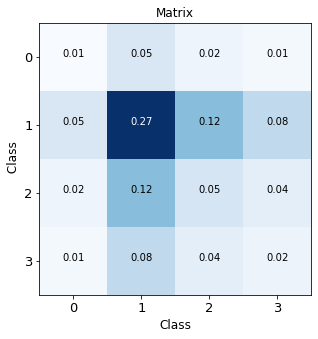

In [55]:
plot_matrix(MM_attribute,
                      classes = [ str(i) for i in range(MM_attribute.shape[0])], 
                      figsize=(5,5))

Assortativity coefficient (network modularity) is positive and low, so the network is not assortative for this attribute. Assortativity coefficient range is [-1;1].

There is a higher probability that similar nodes will be linked than nodes in a random network with the same number of nodes, links and nodes degree.

Links are more likely to form between the nodes of the same type. 

### Degree assortativity

In [56]:
print("Degree assortativity: " + str(nx.degree_assortativity_coefficient(fb)))

Degree assortativity: 0.08505802105736317


The assortativity coefficient is the Pearson correlation coefficient of degree between pairs of linked nodes. Negative value of degree assortativity coefficient indicates a correlation between nodes of different degree. The coefficient is close to 0.

## Community detection

In [57]:
!pip install community
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.community as nx_comm
!pip install infomap
from infomap import Infomap

In [58]:
list_community_sets_greedy = list(nx_comm.greedy_modularity_communities(fb))

partition_greedy = {}
for i, comm in enumerate(list_community_sets_greedy):
    print("Community:", i)
    print(i,comm)
    for n in comm:
        partition_greedy[n]=i


Community: 0
0 frozenset({'21134', '4432', '12516', '9506', '11891', '7593', '17368', '13119', '22450', '15386', '8536', '22054', '2643', '16115', '3742', '10128', '1889', '9134', '3031', '2057', '13439', '11748', '21976', '14077', '20268', '20019', '5009', '13964', '12713', '11182', '10429', '852', '4659', '15296', '9273', '17628', '5198', '21997', '319', '10862', '4832', '18312', '15362', '7930', '5701', '21420', '11002', '16771', '3913', '2212', '20709', '6467', '17710', '10939', '13589', '5995', '4140', '8413', '16594', '3505', '18274', '19278', '18705', '11393', '3604', '5428', '4944', '5086', '11406', '17831', '8966', '1536', '2265', '1286', '8115', '22260', '21492', '16060', '11259', '21646', '285', '12819', '2149', '16699', '18060', '6330', '4768', '8032', '14158', '8712', '5696', '21986', '4770', '1796', '12661', '21852', '18418', '17942', '12433', '630', '2479', '12486', '4174', '13412', '17972', '11009', '17541', '1042', '18837', '18743', '6528', '13662', '6778', '9866', '96

In [59]:
!pip install python-louvain
from community import community_louvain

In [60]:
partition_library = community_louvain.best_partition(fb)

In [61]:
nx.set_node_attributes(fb, partition_library, "community_louvain")

In [62]:
im = Infomap("--two-level")

pairs = []

mapping = {}

for n in fb.nodes:    
    if n not in mapping:
        mapping[n] = len(mapping)

for e in fb.edges():
    src,target = e
    new_pair = (mapping[src],mapping[target])
    pairs.append( new_pair )

im.add_links( pairs )

In [63]:
def findCommunities_infomap(im):

    print("Find communities with Infomap...")
    im.run();
    
    print(f"Found {im.num_top_modules} modules with codelength: {im.codelength}")
    communities = {}
    for node in im.tree:
        if node.is_leaf:
            #print(node.node_id, node.module_id)
            communities[node.node_id] = node.module_id
    
    return communities

In [64]:
partition_infomap = findCommunities_infomap(im = im)

Find communities with Infomap...
Found 801 modules with codelength: 8.861661967413884


In [65]:
nx.set_node_attributes(fb, partition_infomap, "community_infomap")

In [66]:
list_community_sets_lpa = list(nx_comm.label_propagation_communities(fb))
# print(list_community_sets_lpa)

In [67]:
partition_lpa = {}
for i, comm in enumerate(list_community_sets_lpa):
#     print("Community:", i)
#     print(i,comm)
    for n in comm:
        partition_lpa[n]=i

In [68]:
nx.set_node_attributes(fb, partition_lpa, "community_lpa")

In [ ]:
for my_list in [list_community_sets_greedy,  list_community_sets_library]:
    
    #print("Coverage")
    print("Coverage", nx_comm.coverage(fb, my_list))
    #print("Modularity")
    print("Modularity", nx_comm.modularity(fb, my_list, weight='weight'))
    #print("Performance")
    print("Performance", nx_comm.performance(fb, my_list))
    
    print("---")

Coverage 0.931556356066011
Modularity 0.7296619832182506


In [69]:
comms = set(partition_library.values())
comms

list_community_sets_library = [ set() for i in range(len(comms)) ]

for n, comm in partition_library.items():
    list_community_sets_library[comm].add(n)

list_community_sets_library

comms = set(partition_lpa.values())
comms

list_community_sets_lpa = [ set() for i in range(len(comms)) ]

for n, comm in partition_lpa.items():
    list_community_sets_lpa [comm].add(n)

list_community_sets_lpa 

comms = set(partition_infomap.values())
comms

list_community_sets_infomap = [ set() for i in range(max(comms) +1) ]

list_community_sets_infomap

for n, comm in partition_infomap.items():
    list_community_sets_infomap[comm].add(n)

list_community_sets_infomap

method_names = ["Greedy","Louvain library", "LPA", "Infomap",]

for i,my_list in enumerate([list_community_sets_greedy,  list_community_sets_library, list_community_sets_infomap, list_community_sets_lpa ]):
    
    print(method_names[i])
    print()
    
    #print("Coverage")
    print("Coverage", nx_comm.coverage(fb, my_list))
    #print("Modularity")
    print("Modularity", nx_comm.modularity(fb, my_list, weight='weight'))

    
    print("------------------------------------------------------------")
    print()

Greedy

Coverage 0.931556356066011
Modularity 0.7296619832182506
------------------------------------------------------------

Louvain library

Coverage 0.885907767160618
Modularity 0.8125802665554309
------------------------------------------------------------

LPA



NetworkXError: `partition` is not a valid partition of the nodes of G

In [70]:
for partition in [partition_greedy, partition_library,partition_lpa,partition_infomap,]:
    print("Modularity # 2", community_louvain.modularity(partition, fb) )


Modularity # 2 0.7296619832182506
Modularity # 2 0.8125802665554309
Modularity # 2 0.7271688379024736


KeyError: '0'

In [71]:
graph_name = "community_detection"
nx.write_gexf(G=fb,path=f"{graph_name}.gexf")

In [72]:
comms = set(partition_library.values())
comms

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60}

In [73]:
list_community_sets_library = [ set() for i in range(len(comms)) ]

In [74]:
for n, comm in partition_library.items():
    list_community_sets_library[comm].add(n)

list_community_sets_library

[{'0',
  '10029',
  '10052',
  '10088',
  '10158',
  '10340',
  '10411',
  '10463',
  '10635',
  '10647',
  '10683',
  '10738',
  '1079',
  '10796',
  '10945',
  '1099',
  '11082',
  '11090',
  '11276',
  '11319',
  '11457',
  '11628',
  '11659',
  '11718',
  '11763',
  '11810',
  '119',
  '12063',
  '12083',
  '12149',
  '12232',
  '12273',
  '12319',
  '1232',
  '12333',
  '12338',
  '12352',
  '12413',
  '12577',
  '12634',
  '12642',
  '12659',
  '12726',
  '12794',
  '1286',
  '13047',
  '13282',
  '13301',
  '13303',
  '13308',
  '13369',
  '13437',
  '13477',
  '13522',
  '13644',
  '1365',
  '13650',
  '13684',
  '13823',
  '1385',
  '13995',
  '14019',
  '14087',
  '14247',
  '14266',
  '14305',
  '1436',
  '14412',
  '14519',
  '14572',
  '14602',
  '14694',
  '14728',
  '14912',
  '15274',
  '15356',
  '15374',
  '15417',
  '15499',
  '15517',
  '15556',
  '15582',
  '15710',
  '15921',
  '16116',
  '16147',
  '16236',
  '16343',
  '16422',
  '16486',
  '16526',
  '16543',
 

In [75]:
pairs = []
for i, nodes in enumerate(list_community_sets_library):
    print(i,len(nodes))
    comm_size = (i,len(nodes))
    pairs.append(comm_size)

0 302
1 2091
2 1107
3 428
4 878
5 158
6 1109
7 14
8 792
9 859
10 171
11 6
12 468
13 12
14 1239
15 206
16 355
17 3707
18 518
19 1120
20 545
21 393
22 867
23 56
24 308
25 539
26 330
27 55
28 142
29 731
30 431
31 14
32 260
33 157
34 105
35 70
36 250
37 132
38 260
39 136
40 248
41 35
42 192
43 140
44 115
45 45
46 35
47 8
48 9
49 20
50 23
51 14
52 23
53 37
54 9
55 86
56 38
57 21
58 21
59 23
60 7


In [76]:
pairs

[(0, 302),
 (1, 2091),
 (2, 1107),
 (3, 428),
 (4, 878),
 (5, 158),
 (6, 1109),
 (7, 14),
 (8, 792),
 (9, 859),
 (10, 171),
 (11, 6),
 (12, 468),
 (13, 12),
 (14, 1239),
 (15, 206),
 (16, 355),
 (17, 3707),
 (18, 518),
 (19, 1120),
 (20, 545),
 (21, 393),
 (22, 867),
 (23, 56),
 (24, 308),
 (25, 539),
 (26, 330),
 (27, 55),
 (28, 142),
 (29, 731),
 (30, 431),
 (31, 14),
 (32, 260),
 (33, 157),
 (34, 105),
 (35, 70),
 (36, 250),
 (37, 132),
 (38, 260),
 (39, 136),
 (40, 248),
 (41, 35),
 (42, 192),
 (43, 140),
 (44, 115),
 (45, 45),
 (46, 35),
 (47, 8),
 (48, 9),
 (49, 20),
 (50, 23),
 (51, 14),
 (52, 23),
 (53, 37),
 (54, 9),
 (55, 86),
 (56, 38),
 (57, 21),
 (58, 21),
 (59, 23),
 (60, 7)]

In [77]:
community_index = []
number_of_nodes = []

for comm, n_nodes in pairs:
    community_index.append(str(comm))
    number_of_nodes.append(n_nodes)    

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(community_index,number_of_nodes)
plt.xlabel("Community")
plt.ylabel("Number of nodes")
plt.savefig('comm.png')

In [79]:
for comm in list_community_sets_library:
    subgraph = fb.subgraph(comm)
    #print(subgraph.order())

In [80]:
centr_comm = {}
# node -> centrality in the community subgraph

In [81]:
for comm in list_community_sets_library:
    subgraph = fb.subgraph(comm)
    print(subgraph.order())
    print(nx.degree_centrality(subgraph))
    print("---")

302
{'2814': 0.04983388704318937, '12063': 0.0033222591362126247, '119': 0.013289036544850499, '2966': 0.009966777408637873, '19382': 0.016611295681063124, '2632': 0.013289036544850499, '14247': 0.03986710963455149, '3480': 0.009966777408637873, '8752': 0.023255813953488372, '4783': 0.0033222591362126247, '3571': 0.0033222591362126247, '10158': 0.0033222591362126247, '16543': 0.036544850498338874, '19256': 0.019933554817275746, '293': 0.19269102990033224, '16674': 0.009966777408637873, '17629': 0.006644518272425249, '1099': 0.009966777408637873, '4164': 0.009966777408637873, '4447': 0.023255813953488372, '16753': 0.006644518272425249, '4312': 0.019933554817275746, '12413': 0.019933554817275746, '17943': 0.013289036544850499, '11763': 0.009966777408637873, '18350': 0.0033222591362126247, '5566': 0.03322259136212625, '3872': 0.0033222591362126247, '17751': 0.023255813953488372, '12352': 0.006644518272425249, '7609': 0.023255813953488372, '7192': 0.03986710963455149, '22322': 0.0199335548

{'970': 0.005415162454873647, '10289': 0.006317689530685921, '18656': 0.03068592057761733, '5030': 0.023465703971119134, '7076': 0.027978339350180507, '5799': 0.03790613718411553, '5634': 0.033393501805054154, '22078': 0.0036101083032490976, '1319': 0.03249097472924188, '21840': 0.01444043321299639, '10692': 0.027978339350180507, '8945': 0.0027075812274368234, '7945': 0.07129963898916968, '6676': 0.015342960288808665, '10828': 0.05685920577617329, '19261': 0.019855595667870037, '14328': 0.007220216606498195, '13590': 0.007220216606498195, '20937': 0.039711191335740074, '11453': 0.018050541516245487, '12887': 0.00812274368231047, '16779': 0.02707581227436823, '18260': 0.007220216606498195, '3932': 0.03790613718411553, '7989': 0.005415162454873647, '7894': 0.009025270758122744, '22450': 0.01444043321299639, '16542': 0.0027075812274368234, '1487': 0.0009025270758122744, '17368': 0.0009025270758122744, '9531': 0.03249097472924188, '13538': 0.004512635379061372, '2643': 0.001805054151624548

{'3790': 0.0005396654074473826, '22165': 0.0005396654074473826, '1473': 0.0005396654074473826, '1447': 0.0016189962223421479, '4432': 0.0035078251484079873, '2618': 0.0013491635186184566, '12631': 0.009444144630329197, '258': 0.0008094981111710739, '9676': 0.0016189962223421479, '14410': 0.0005396654074473826, '66': 0.0021586616297895305, '11891': 0.0010793308148947653, '4474': 0.0040474905558553695, '2956': 0.0010793308148947653, '6178': 0.0018888289260658392, '16152': 0.0002698327037236913, '14893': 0.0008094981111710739, '16115': 0.0016189962223421479, '4844': 0.0008094981111710739, '20171': 0.0002698327037236913, '15305': 0.0008094981111710739, '10128': 0.0002698327037236913, '12927': 0.0008094981111710739, '19668': 0.0013491635186184566, '7047': 0.0005396654074473826, '14151': 0.0029681597409606042, '5270': 0.0005396654074473826, '21656': 0.0005396654074473826, '17156': 0.0008094981111710739, '14697': 0.0021586616297895305, '15516': 0.0010793308148947653, '17519': 0.00026983270372

{'12544': 0.016438356164383564, '5245': 0.00684931506849315, '2388': 0.019178082191780823, '5958': 0.0027397260273972603, '18724': 0.00684931506849315, '22032': 0.005479452054794521, '1555': 0.004109589041095891, '4668': 0.0027397260273972603, '16254': 0.009589041095890411, '6400': 0.005479452054794521, '9473': 0.0013698630136986301, '14583': 0.0027397260273972603, '13779': 0.0013698630136986301, '20712': 0.009589041095890411, '16241': 0.015068493150684932, '19064': 0.0013698630136986301, '12432': 0.008219178082191782, '15732': 0.0136986301369863, '15352': 0.015068493150684932, '21753': 0.026027397260273973, '11026': 0.0027397260273972603, '13574': 0.045205479452054796, '638': 0.005479452054794521, '5751': 0.0273972602739726, '9366': 0.036986301369863014, '4615': 0.0589041095890411, '4130': 0.005479452054794521, '9888': 0.0027397260273972603, '14630': 0.0013698630136986301, '19309': 0.0013698630136986301, '20759': 0.0027397260273972603, '18801': 0.0136986301369863, '21253': 0.034246575

In [82]:
for comm in list_community_sets_library:
    subgraph = fb.subgraph(comm)
#     print(subgraph.order())
#     print(nx.degree_centrality(subgraph))
    
    node_degrees  = nx.degree_centrality(subgraph)
    for n,d in node_degrees.items():
        centr_comm[n] = d

In [83]:
nx.set_node_attributes(fb, centr_comm, "centr_comm")

In [84]:
nx.write_gexf(G=fb,path=f"{graph_name}.gexf")

In [85]:
ind = community_louvain.induced_graph(partition_library, fb)

In [86]:
print(nx.info(ind))

Name: 
Type: Graph
Number of nodes: 61
Number of edges: 641
Average degree:  21.0164


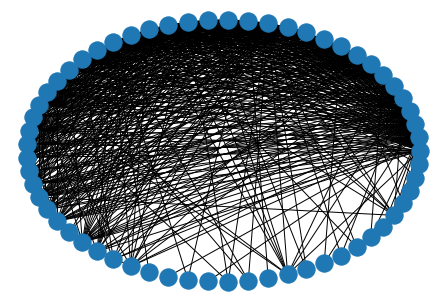

In [87]:
nx.draw_circular(ind)

In [88]:
nx.write_gexf(G=ind, path=f"community_{graph_name}.gexf")